In [ ]:
!pip install walloc PyWavelets pytorch-wavelets

In [ ]:
!wget "https://r0k.us/graphics/kodak/kodak/kodim05.png"

In [1]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from torchvision.transforms import ToPILImage, PILToTensor
from walloc.walloc import Walloc
class Args: pass

In [2]:
device = "cpu"
checkpoint = torch.load("v0.5.1.pth",map_location="cpu")
args = checkpoint['args']
codec = Walloc(
    channels = args.channels,
    J = args.J,
    N = args.N,
    latent_dim = args.latent_dim,
    latent_bits = 6
)
codec.load_state_dict(checkpoint['model_state_dict'])
codec = codec.to(device)

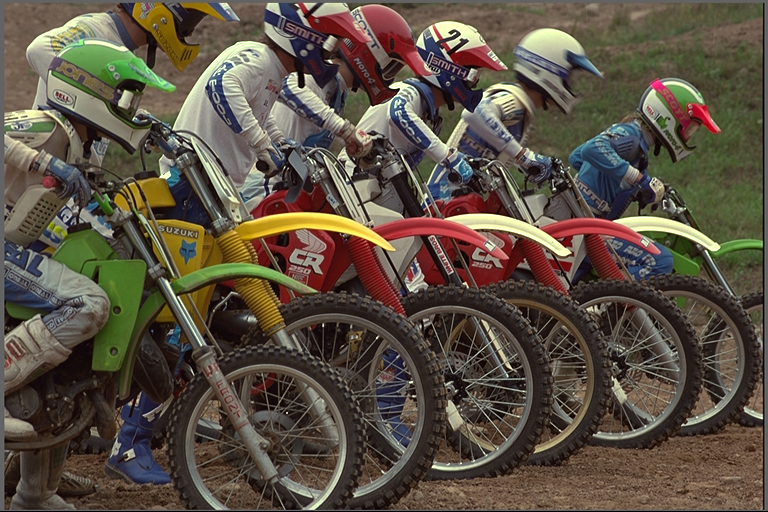

In [3]:
img = Image.open("kodim05.png")
img

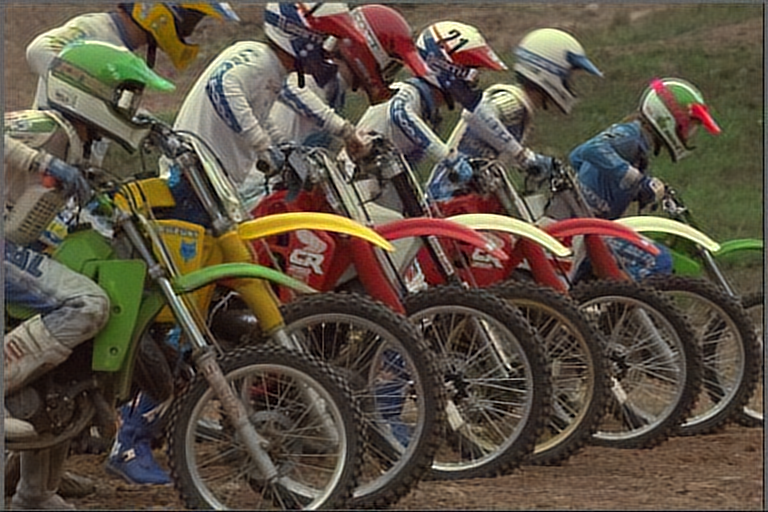

In [4]:
with torch.no_grad():
    codec.eval()
    x = PILToTensor()(img).to(torch.float)
    x = (x/255 - 0.5).unsqueeze(0).to(device)
    x_hat, _, _ = codec(x)
ToPILImage()(x_hat[0]+0.5)

In [5]:
with torch.no_grad():
    codec.eval()
    X = codec.wavelet_analysis(x,J=codec.J)
    Y = codec.encoder(X)
    X_hat = codec.decoder(Y)
    x_hat = codec.wavelet_synthesis(X_hat,J=codec.J)

print(f"dimensionality reduction: {x.numel()/Y.numel()}x")

dimensionality reduction: 16.0x


In [6]:
Y.unique()

tensor([-31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
        -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
         -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
          5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
         17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
         29.,  30.,  31.])

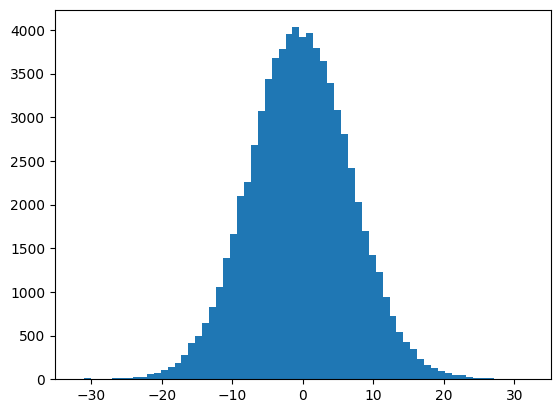

In [7]:
plt.hist(Y.flatten().numpy(),range=(-32,32),bins=65);

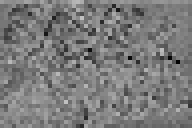

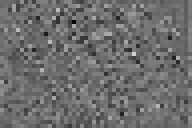

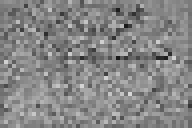

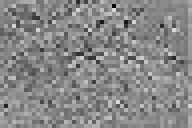

In [8]:
for latent in Y[0,:4,:,:]:
    display(ToPILImage()(0.5*latent/codec.latent_max + 0.5).resize((192,128),resample=Image.Resampling.NEAREST))